# Exercise 3

# Generating plots with Python

In the last exercise, you used several methods of the `numpy` package for efficient numerical calculations with Python. After performing some sort of scientific calculation, we usually want to generate visulsaions of some sort - from simple 2-D plots of processing and analysis results of data to sophisticated 3-D visualisations of simulation results. In this notebook, we will have a look at some of the possibilities to perform these visualisations.

We already generated graphs of functions in the first exercise, and we even added a legend and axes descriptions - with methods from the `pylab` packge, a part of the library `matplotlib`, that we imported using:
    
    from pylab import *

We discussed at the beginning of the second notebook that these types of bulk-imports (`from xxx import *`) can lead to problems if multiple functions are imported with the same name - but from different libraries. It is therefore recommended to use another way to include the plotting methods:

    import matplotlib.pyplot as plt
    
The plotting methods can then be accessed from the namespace `plt`, using the "dot"-operator as before, for example:

    plt.plot(x,y)
    plt.show()
    
In addition, the `matplotlib` library contains many more methods for plotting, e.g. multiple axes in one figure, or representation of data in 3-D. We will have a look at a selection of these methods below.

Finally, as a little bonus at the end, we will have a quick look at some more advanced Python plotting packages.

In [57]:
# Execute this cell to get the notebook style adjusted:
from IPython.core.display import HTML
css_file = 'nre2_style.css'
HTML(open(css_file, "r").read())

In [6]:
%matplotlib inline

In [7]:
import matplotlib.pyplot as plt

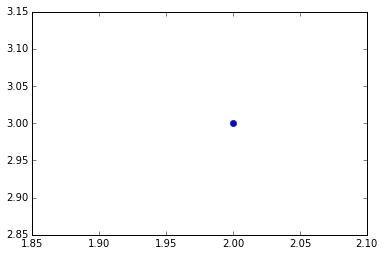

In [8]:
plt.plot(2,3,'o')

## Simple 2-D plots with `pyplot`

The methods to create plots with `matplotlib.pyplot` is very similar to the way plots are generated in Matlab, and to the methods in the library `pylab` that we used in the exercise notebook 1. 

To highlight the similarity, we will now create the exact same plot that we did for exercise 1, now with `pyplot`.

We start with importing the package and `numpy` as we will use it to generate the data:

In [10]:
import matplotlib.pyplot as plt
import numpy as np

As a first step, use your new knowledge about `numpy` to create:

1. The array of values between 0 and 2$\pi$ for the x-values (hint: the value of pi is stored in the variable `np.pi`);
2. the sine, and
3. the cosine values, stored in additional arrays:

In [11]:
# complete this code yourself:
xvals = np.arange(0,2*np.pi,0.1)
sin_vals = np.sin(xvals)
cos_vals = np.cos(xvals)

Now, have a look again at the plot generation in exercise 1 and reproduce the same plot here - now using the `pyplot`-way.

Hint: actually, you just have to add `plt.` before each command:

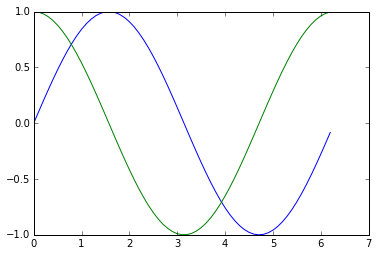

In [12]:
# your code here
plt.plot(xvals,sin_vals)

plt.plot(xvals,cos_vals)


## Symbols and line styles

If you pass multiple values in an array (or list), then a line plot is generated by default. You can adjust line styles and colors with a parameter (similar to Matlab, again!) and additional keyword options.

For an extensive list, see:

    help(plt.plot)

Here some examples:

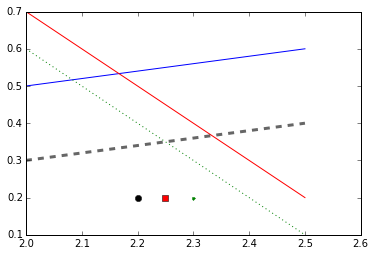

In [13]:
# normal line
plt.plot([2.0, 2.5],[0.5,0.6],'-')
# different color (coding: 'r' = red, 'g' = green, 'k' = black; other names possible, see help!)
plt.plot([2.0, 2.5],[0.7,0.2],'r-')
# thick dashed black line
plt.plot([2.0, 2.5],[0.3,0.4],'k--', linewidth = 3, alpha=0.6)
# dotted green line
plt.plot([2.0, 2.5],[0.6,0.1],'g:')

# and now some points
# black filled circle
plt.plot(2.2,0.2,'ko')
# green dot
plt.plot(2.3,0.2,'g.')
# red square
plt.plot(2.25,0.2,'rs')

# again: for more options, see help(plt.plot) !



## Adding axis labels, title and legend

No scientific plot is complete without correct axis labels. Here the commands to add them to a plot:

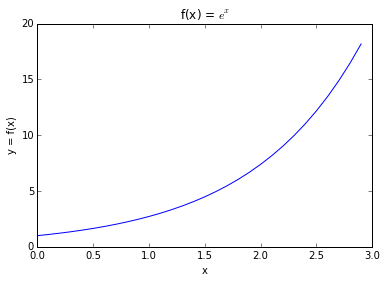

In [14]:
# create some data to plot
x = np.arange(0,3,0.1)
plt.plot(x,np.exp(x))
plt.xlabel("x")
plt.ylabel("y = f(x)")
plt.title("f(x) = $e^x$") # you can use LaTeX notation in matplotlib labels!

Furthermore, gridlines can be useful. And, for cases where multiple datasets/ functions are plotted, we would like to have a legend. Here an example:

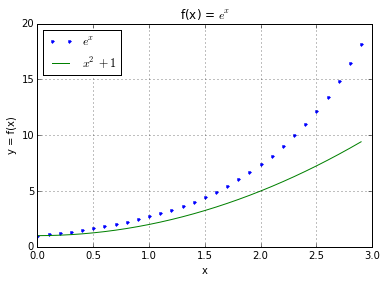

In [15]:
# create some data to plot
x = np.arange(0,3,0.1)
plt.plot(x,np.exp(x), '.', label="$e^x$") # add a lable to the function for the legend
plt.plot(x,x**2+1, label = "$x^2+1$")
plt.xlabel("x")
plt.ylabel("y = f(x)")
plt.legend(loc = 'best') # add a legend with defined position (try default!)
plt.title("f(x) = $e^x$") # you can use LaTeX notation in matplotlib labels!
# to add grid lines:
plt.grid()

Play around with the settings to see how they work! One more that you will probably like to change from time to time: the size of the figure. You can do this by explicitly creating the figure with `plt.figure` and setting the figure size as a parameter. Another aspect you might want to change is the text size of the plot. This parameter (like many others) can be set in the dictionary `rcParams`, e.g.:

    plt.rcParams['font.size'] = 16

For more customisation options, see: http://matplotlib.org/users/customizing.html

Here an example:

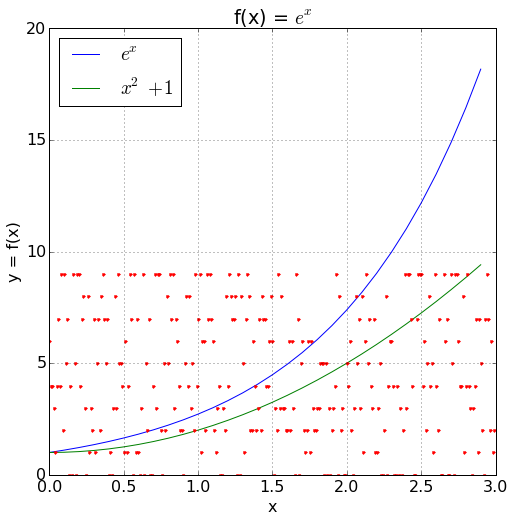

In [56]:
plt.figure(figsize=(8,8))
plt.rcParams['font.size'] = 16
# create some data to plot
x = np.arange(0,3,0.1)
plt.plot(x,np.exp(x), label="$e^x$") # add a lable to the function for the legend
plt.plot(x,x**2+1, label = "$x^2+1$")
xvals = np.arange(0,3,0.01)
yvals = np.random.randint(0,10,size=np.shape(xvals))
plt.plot(xvals, yvals, '.')
plt.xlabel("x")
plt.ylabel("y = f(x)")
plt.legend(loc = 'upper left') # add a legend with defined position (try default!)
plt.title("f(x) = $e^x$") # you can use LaTeX notation in matplotlib labels!
# to add grid lines:
plt.grid()
plt.savefig("functions.png")

In [55]:
# let's change the options back to standard:
plt.figure(figsize=(6,8))
plt.rcParams['font.size'] = 12

## Using figures and axes for more functionality

We can use the `pyplot` methods to create a wide range of typical figures, for data plotting, functions, etc. However, as soon as we want to add some more features into the same plot, show several axes side by side, or adjust the settings a bit more, the simple plotting methods are quite restricted.

The simple way forward is here to first create a `figure` object, and then to include into it one or several objects that contain plots (termed `axes` in `pyplot`). As each of these instances are Python objects, we can store them in a variable name and access them later to add more features, or to pass them to a function.

If you are not familiar with object-oriented programming concepts, don't worry: you can still use the plotting methods in this way - the basic logic is quite simple, once you get used to it.

We start with first creating a container for a figure:

In [31]:
import matplotlib.pyplot as plt
fig = plt.figure()

We can now add plots to the figure. A simple way to achieve this is to create axis objects with the `add_subplot` method. This method is again similar to the standard Matlab method (sorry, non-Matlab users!) and can be used to add a total of `n_subplots` in a regular "windows" pattern. Here an example:

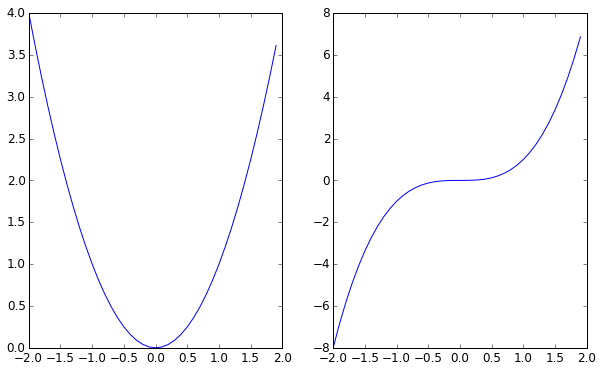

In [32]:
fig = plt.figure(figsize = (10,6))
ax1 = fig.add_subplot(121) # first of a total of 2 subplots
ax2 = fig.add_subplot(122) # second subplot
x = np.arange(-2,2,0.1)
ax1.plot(x, x**2)
ax2.plot(x, x**3)
plt.show()

Have a look what happens if you change the three-digit numbers in the `add_subplot` command to:

    ax1 = fig.add_subplot(211) # first two digits swapped
    ax2 = fig.add_subplot(212) # first two digits swapped
    
Can you see the logic behind this command?

I am usually using this method to create plots as it enables a little more flexibility. One (unfortunate, in my point of view) issue is that, if you use the axis objects and want to add labels, you have to use different methods. Here an example:

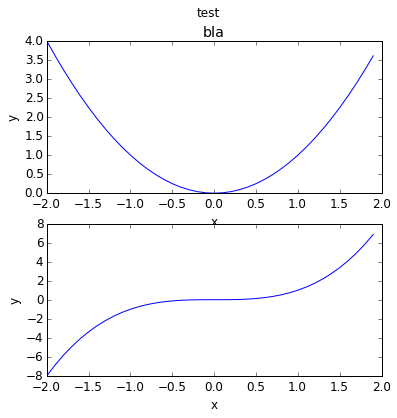

In [34]:
# The first part is exactly as before:
fig = plt.figure(figsize = (6,6))
ax1 = fig.add_subplot(211) 
ax2 = fig.add_subplot(212) 
x = np.arange(-2,2,0.1)
ax1.plot(x, x**2)
#
# Now: add labels to axis
#
ax1.set_xlabel("x") #Note: we have to use ax1.set_xlabel()! Before: plt.xlabel()
ax1.set_ylabel("y")
ax1.set_title("bla")
ax2.plot(x, x**3)
ax2.set_xlabel("x") # Note: we have to use ax1.set_xlabel()! Before: plt.xlabel()
ax2.set_ylabel("y")
#
fig.suptitle("test")
#plt.tight_layout()  # uncomment to avoid overlap (see next text box)
plt.show()


Another (very unfortunate) issue with the standard implementation is that the axis labels can overlap over another figure (this probably happened in the figure you just created). To fix this issue, uncomment the function

    plt.tight_layout()
    
above to avoid the overlap. For more information on fixing potential problems with the plot layout, see: http://matplotlib.org/users/tight_layout_guide.html

## Creating 2-D image, contour, and surface plots

We often want to create plots for functions of more than one variable. For example, in the course of the exercise class, we will simulate fluid flow, heat transport, etc. in 2-D and 3-D and then need methods to visualise the calculated fields.

Generating basic figures of 2-D fields is straight-forward with methods from the `matplotlib.pyplot` package. We can create image and countour maps, as well as surface plots and wireline grids in perspective 3-D visualisations - and we will have a look at all of these methods in the following.

## Short intermezzo: input fields for x- and y-values

Before looking at the usage of these methods, we first need ways to generate suitable input data fields. Creating these fields requires a little thought. Let's say we want to create a field where we assign to each position (x,y) the distance to the origin, i.e.:

$$f(x,y) = \sqrt{x^2 + y^2}$$

Usually, we think about x- and y-ranges as 1-D arrays with a defined range and increment:

In [37]:
x = np.arange(-10,10,0.1)
y = np.arange(-10,10,0.1)

We now could iterate over each x-value and y-value with two nested `for`-loops and calculate the distance to the origin and assign it back to a 2-D array. However, we know from the last exercise that these types of loops should be avoided, if possible.

A more efficient (and a lot cleaner) way is to use appropriate vectorised `numpy` methods again. Let's first look at a very useful function, the `meshgrid` method (again: for Matlab users, I am sure this rings a bell..). This method creates two 2-D fields from two 1-D input arrays, basically copying values once in x-direction and once in y-direction. 

This might sound a bit confusing, let's have a look at an example: we start with two (short) example arrays:

In [38]:
x_short = np.arange(0,2.5,0.5)
y_short = np.arange(0,2.5,0.5)
print type(x_short)

<type 'numpy.ndarray'>


Now, we apply the `meshgrid` function. Note that this function returns two objects (the two grids) in a list. There are two ways to access the return values from: we can either use a list object and then extract the single fields from this return list:

In [39]:
meshgrid_return_list = np.meshgrid(x_short, y_short)
X_short = meshgrid_return_list[0] # 2-D field for x-values
Y_short = meshgrid_return_list[1] # 2-D field for y-values

In [40]:
X_short

array([[ 0. ,  0.5,  1. ,  1.5,  2. ],
       [ 0. ,  0.5,  1. ,  1.5,  2. ],
       [ 0. ,  0.5,  1. ,  1.5,  2. ],
       [ 0. ,  0.5,  1. ,  1.5,  2. ],
       [ 0. ,  0.5,  1. ,  1.5,  2. ]])

If you know how many objects are returned (two, in our case), you can also "unpack" the return values directly with the function call:

In [41]:
(X_short, Y_short) = np.meshgrid(x_short, y_short)

The first brackets around the return value list are actually optional, you could equally write: 

In [42]:
X_short.dtype

dtype('float64')

Use whatever version you find more intuitive and useful.

Let's have a look at those two fields that we generated:

In [43]:
X_short

array([[ 0. ,  0.5,  1. ,  1.5,  2. ],
       [ 0. ,  0.5,  1. ,  1.5,  2. ],
       [ 0. ,  0.5,  1. ,  1.5,  2. ],
       [ 0. ,  0.5,  1. ,  1.5,  2. ],
       [ 0. ,  0.5,  1. ,  1.5,  2. ]])

In [44]:
Y_short

array([[ 0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0.5,  0.5,  0.5,  0.5,  0.5],
       [ 1. ,  1. ,  1. ,  1. ,  1. ],
       [ 1.5,  1.5,  1.5,  1.5,  1.5],
       [ 2. ,  2. ,  2. ,  2. ,  2. ]])

We now have two fields: one with increasing values in x-direction, and one with increasing values in y-direction, with the spacings and ranges that were defined in the arrays `x_short` and `y_short`. 

Think now a second on how the `numpy` methods work. With these two fields, generating a field of "distance to origin" values with the function above is very simple if you use the appropriate `numpy` commands. Try it yourself:


In [46]:
distance = np.sqrt([X_short**2 + Y_short**2])      #  add appropriate numpy methods to calculate distance

Have a look at the distance field to check if your calculation is correct:

In [47]:
distance = np.sqrt(X_short**2 + Y_short**2)
distance.shape

(5L, 5L)

## Creating an image of a distance field

We will now have a look at several methods to generate visual representations of the calculated distance field. The simplest method is to create an image with the method `plt.imshow()` where each pixel corresponds to one position in the 2-D array, and the pixel colour represents the function value:

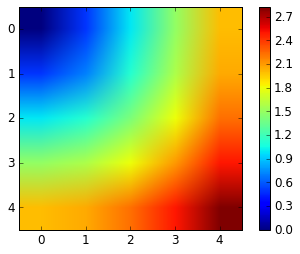

In [54]:
plt.imshow(distance)
# add a colorbar to show the function values
plt.colorbar()

Ok, this is a nice and fast representation, but if you look carefully, you will see several problems with this map:

1. The origin is on the top left - but usually, we want to have the lowest y-values at the bottom left
2. The x- and y-axes are labeled with the pixel number - and not with the x- and y-values.
3. A more subtle point: the field is interpolated! We only calculated the distance at 5 values in each direction - and yet, this figure looks smooth, giving the impression that we have a lot higher resolution of our results field. As I said, this is a subtle point - in some cases, it might be desired to plot a smoothed interpolation of the values, but for proper scientific evaluations, it is more suitable to show the values as they are!
4. Of course, the figure is missing axes labels, a title, and the colorbar an indication what the values actually mean...

Let's consider all of these features:

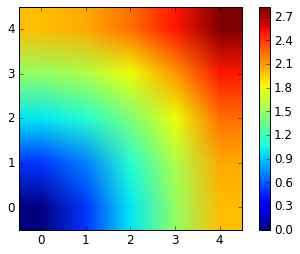

In [55]:
# First: origin to lower-left
plt.imshow(distance, origin = 'lower')
# add a colorbar to show the function values
plt.colorbar()

0.0
2.0
0.0
2.0


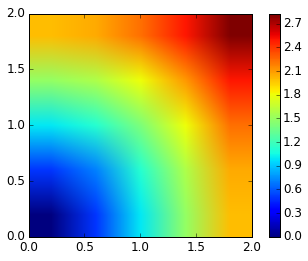

In [52]:
# Second: use correct extent for x- and y-axes
# a) determine extent from arrays and store in list [xmin, xmax, ymin, ymax]
extent = [x_short[0], x_short[-1], y_short[0], y_short[-1]]
# b) add extent as keyword:
plt.imshow(distance, origin = 'lower_left', extent = extent)
# add a colorbar to show the function values
plt.colorbar()

print x_short[0]
print x_short[-1]
print y_short[0]
print y_short[-1]

<matplotlib.colorbar.Colorbar instance at 0x000000000B9E45C8>

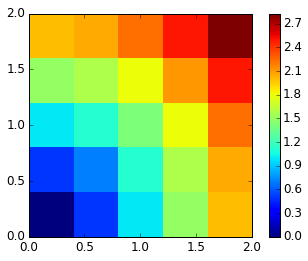

In [53]:
# Third: do not interpolate (use nearest point instead):
extent = [x_short[0], x_short[-1], y_short[0], y_short[-1]]
plt.imshow(distance, origin = 'lower_left', extent = extent,  )
# add a colorbar to show the function values
plt.colorbar()

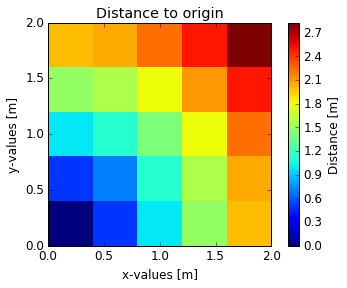

In [58]:
# Almost there! Last point: add labels:
extent = [x_short[0], x_short[-1], y_short[0], y_short[-1]]
plt.imshow(distance, origin = 'lower_left', extent = extent, interpolation = 'nearest')
# add a colorbar to show the function values
cbar = plt.colorbar()
cbar.set_label("Distance [m]")
plt.xlabel("x-values [m]")
plt.ylabel("y-values [m]")
plt.title("Distance to origin")

## Contour plots

Another common type of plots are contour plots, representing lines of equal values in a field. As the resolution of our example before was quite low, we will first create a distance field with smaller increments in x- and y-direction, and also extend it to negative values:

In [59]:
x = np.arange(-10,10,0.1)
y = np.arange(-10,10,0.1)
X,Y = np.meshgrid(x,y) # this is the way that I use meshgrid, you can adapt to your style
d = np.sqrt(X**2 + Y**2) # I hope you figured that out yourself.

The method to create a contour plot is `plt.contour`. In addition, filled contour plots can also be created, with the method `plt.contourf`. Here some examples:

<matplotlib.colorbar.Colorbar instance at 0x000000000BC7C748>

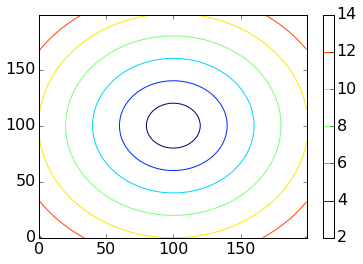

In [60]:
plt.contour(d)
plt.colorbar()

Similar to the points before, we would like to add some features and use the correct ranges on the x- and y-axes. The notation is a bit different in this case:

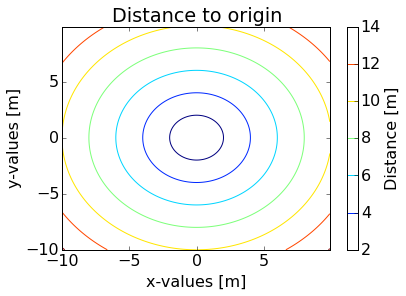

In [62]:
plt.contour(X, Y, d) # use here the 2-D fields directly to get the correct range!
# the following commands are exactly as before:
cbar = plt.colorbar()
cbar.set_label("Distance [m]")
plt.xlabel("x-values [m]")
plt.ylabel("y-values [m]")
plt.title("Distance to origin")

The `contour` method choses the levels for the contours automatically per default. If you like, you can explicitly define the contour levels (see `help(contour)` for details) or increase the number of contour lines:

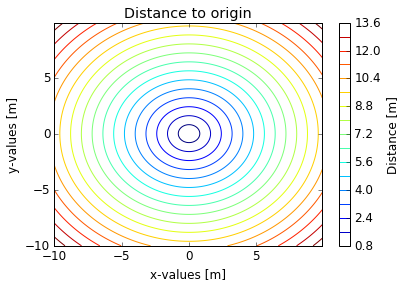

In [62]:
# set number of countour lines:
n_contours = 20
plt.contour(X, Y, d, n_contours) # use here the 2-D fields directly to get the correct range!
# the following commands are exactly as before:
cbar = plt.colorbar()
cbar.set_label("Distance [m]")
plt.xlabel("x-values [m]")
plt.ylabel("y-values [m]")
plt.title("Distance to origin")

## Filled contour plot

Creating a plot of filled contours is very simple: just use the function `plt.contourf` instead of `plt.contour` above, everything else remains as before. Have a go:

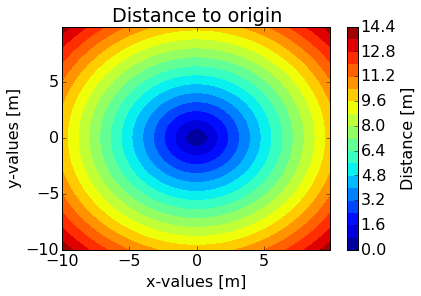

In [64]:
# your code here
n_contours=20
plt.contourf(X, Y, d, n_contours) # use here the 2-D fields directly to get the correct range!
# the following commands are exactly as before:
cbar = plt.colorbar()
cbar.set_label("Distance [m]")
plt.xlabel("x-values [m]")
plt.ylabel("y-values [m]")
plt.title("Distance to origin")



## Combining different types of plots

You can easily combine the different types of plots that we used so far. For example, you can overlay a contour plot over an `imshow` image:



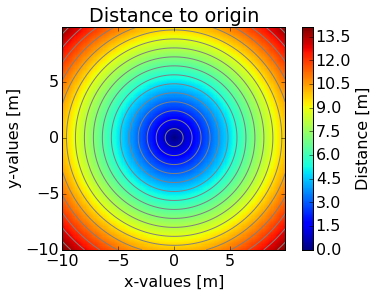

In [65]:
# First: create image
extent = [x[0], x[-1], y[0], y[-1]]
plt.imshow(d, origin = 'lower_left', extent = extent, interpolation = 'nearest')
cbar = plt.colorbar()
cbar.set_label("Distance [m]")
# Second: overlay image with contour lines
n_contours = 20
# set colors of countour lines all to gray
plt.contour(X, Y, d, n_contours, colors='gray') 
plt.xlabel("x-values [m]")
plt.ylabel("y-values [m]")
plt.title("Distance to origin")

## A short note on colormaps

A colormap defines the color range and values that are used to represent the function values in the plots above. The default colormap in `matplotlib` is the so-called `jet` colormap, ranging from blue over green and yellow to red - as you can see in all the images above. This is similar (or even the same) standard colormap as in Matlab and widely used. 

However, this colormap is far from ideal and should actually be avoided. Without going into detail here, I'd just like to mention that it is, for example, extremely unsuitable for colorblind people, looks bad if copied or printed on grayscale and can leave wrong impressions of increments. 

There is a whole field of studies related to the question how to get better colorbars. If you are interested, here are some discussions (and rants) on this topic:
- http://eagereyes.org/basics/rainbow-color-map
- http://medvis.org/2012/08/21/rainbow-colormaps-what-are-they-good-for-absolutely-nothing/
- https://jakevdp.github.io/blog/2014/10/16/how-bad-is-your-colormap/

And here a paper on the topic:

http://ieeexplore.ieee.org/xpls/icp.jsp?arnumber=4118486

To avoid all the bad things with `jet` (or `rainbow`) colormaps, a good starting point is simply to use grayscale plots, or plots between white and one color, or between two colors (if you have negative values). You can set the colormap with the `cmap` keyword in the plot commands. Here some examples:

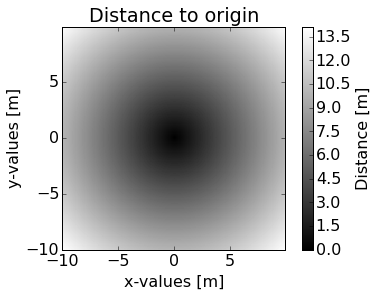

In [66]:
extent = [x[0], x[-1], y[0], y[-1]]
plt.imshow(d, origin = 'lower_left', 
           extent = extent, 
           cmap = 'gray',
           interpolation = 'nearest')
# add a colorbar to show the function values
cbar = plt.colorbar()
cbar.set_label("Distance [m]")
plt.xlabel("x-values [m]")
plt.ylabel("y-values [m]")
plt.title("Distance to origin")

You can simply reverse a colormap with adding "\_r" to the name:

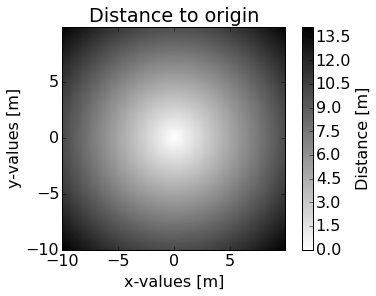

In [67]:
extent = [x[0], x[-1], y[0], y[-1]]
plt.imshow(d, origin = 'lower_left', 
           extent = extent, 
           cmap = 'gray_r',
           interpolation = 'nearest')
# add a colorbar to show the function values
cbar = plt.colorbar()
cbar.set_label("Distance [m]")
plt.xlabel("x-values [m]")
plt.ylabel("y-values [m]")
plt.title("Distance to origin")

For a quick list of colormaps, type

    plt.colormaps()
    
A graphical overview is given here:

http://wiki.scipy.org/Cookbook/Matplotlib/Show_colormaps

In [68]:
# get a list of available colormaps:
plt.colormaps()

[u'Accent',
 u'Accent_r',
 u'Blues',
 u'Blues_r',
 u'BrBG',
 u'BrBG_r',
 u'BuGn',
 u'BuGn_r',
 u'BuPu',
 u'BuPu_r',
 u'CMRmap',
 u'CMRmap_r',
 u'Dark2',
 u'Dark2_r',
 u'GnBu',
 u'GnBu_r',
 u'Greens',
 u'Greens_r',
 u'Greys',
 u'Greys_r',
 u'OrRd',
 u'OrRd_r',
 u'Oranges',
 u'Oranges_r',
 u'PRGn',
 u'PRGn_r',
 u'Paired',
 u'Paired_r',
 u'Pastel1',
 u'Pastel1_r',
 u'Pastel2',
 u'Pastel2_r',
 u'PiYG',
 u'PiYG_r',
 u'PuBu',
 u'PuBuGn',
 u'PuBuGn_r',
 u'PuBu_r',
 u'PuOr',
 u'PuOr_r',
 u'PuRd',
 u'PuRd_r',
 u'Purples',
 u'Purples_r',
 u'RdBu',
 u'RdBu_r',
 u'RdGy',
 u'RdGy_r',
 u'RdPu',
 u'RdPu_r',
 u'RdYlBu',
 u'RdYlBu_r',
 u'RdYlGn',
 u'RdYlGn_r',
 u'Reds',
 u'Reds_r',
 u'Set1',
 u'Set1_r',
 u'Set2',
 u'Set2_r',
 u'Set3',
 u'Set3_r',
 u'Spectral',
 u'Spectral_r',
 u'Wistia',
 u'Wistia_r',
 u'YlGn',
 u'YlGnBu',
 u'YlGnBu_r',
 u'YlGn_r',
 u'YlOrBr',
 u'YlOrBr_r',
 u'YlOrRd',
 u'YlOrRd_r',
 u'afmhot',
 u'afmhot_r',
 u'autumn',
 u'autumn_r',
 u'binary',
 u'binary_r',
 u'bone',
 u'bone_r',
 u'b

Hint: if you made it through to here, then finishing the first assignment will be really easy - just include the function for drawdown and update the figures!

## Using the new matplotlib colormap

Luckily, there is light at the end of the tunnel: Matlab has (finally!) decided to include a new default colormap (sparula), and there is hope that many other programs will follow!

Matplotlib will also have a new default colormap, soon (from 1.5, I believe). Until this is the case, here is how you can use the new version, already.

1. Download `colormaps.py` from L2P
2. Register and use colormap with commands given below

For a very insightful and entertaining talk on this subject, see the next block.

Most important comment of this talk: "Don't use jet - it kills people!"

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('xAoljeRJ3lU')

In [69]:
import colormaps as cmaps
plt.register_cmap(name='viridis', cmap=cmaps.viridis)
plt.register_cmap(name='magma', cmap=cmaps.magma)
plt.set_cmap(cmaps.viridis)

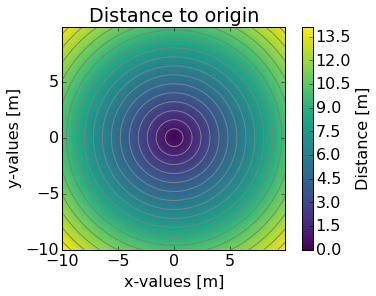

In [70]:
# First: create image
extent = [x[0], x[-1], y[0], y[-1]]
plt.imshow(d, origin = 'lower_left', extent = extent, interpolation = 'nearest')
cbar = plt.colorbar()
cbar.set_label("Distance [m]")
# Second: overlay image with contour lines
n_contours = 20
# set colors of countour lines all to gray
plt.contour(X, Y, d, n_contours, colors='gray') 
plt.xlabel("x-values [m]")
plt.ylabel("y-values [m]")
plt.title("Distance to origin")

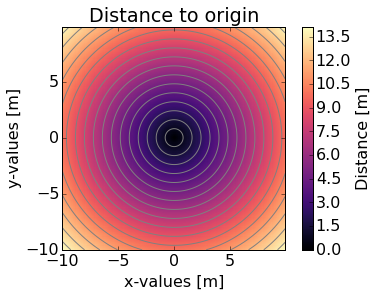

In [71]:
plt.set_cmap(cmaps.magma)
# First: create image
extent = [x[0], x[-1], y[0], y[-1]]
plt.imshow(d, origin = 'lower_left', extent = extent, interpolation = 'nearest')
cbar = plt.colorbar()
cbar.set_label("Distance [m]")
# Second: overlay image with contour lines
n_contours = 20
# set colors of countour lines all to gray
plt.contour(X, Y, d, n_contours, colors='gray') 
plt.xlabel("x-values [m]")
plt.ylabel("y-values [m]")
plt.title("Distance to origin")

## Perspective plots of surfaces and meshes

Finally, we will have a look at perspective plots of 2-D fields as surfaces and meshes, represented in 3-D. These types of plots are useful to get a "spatial" impression of the data which is sometimes more intuitive than a 2-D field representation.

We will have a look at two commonly used types of plots: surface plots and wireline plots. Before we create these plots, we have to load an additional package from the `matplotlib` library:

In [72]:
from mpl_toolkits.mplot3d import Axes3D

As a next step, we have to create the figure container and create an axes object in it (as described above). This is required here so that we can set the projection to 3-D:

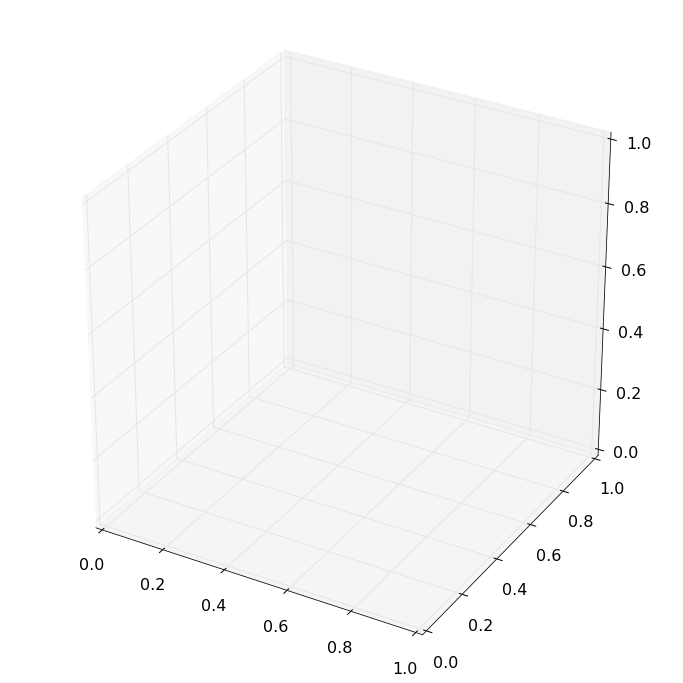

In [73]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')

Now, we can use the `plot_surface` command to add the surface:

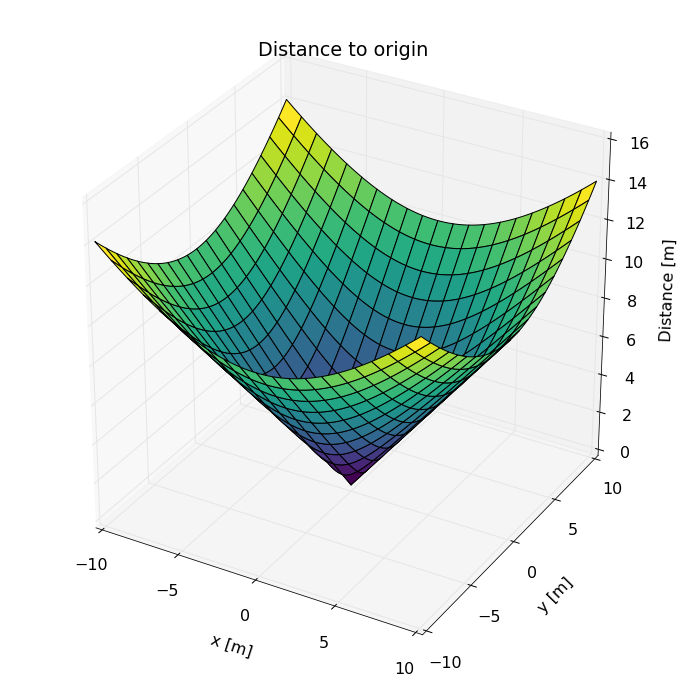

In [75]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, d, cmap='viridis') # my new favourite colormap
ax.set_xlabel("x [m]")
ax.set_ylabel("y [m]")
ax.set_zlabel("Distance [m]")
ax.set_title("Distance to origin")

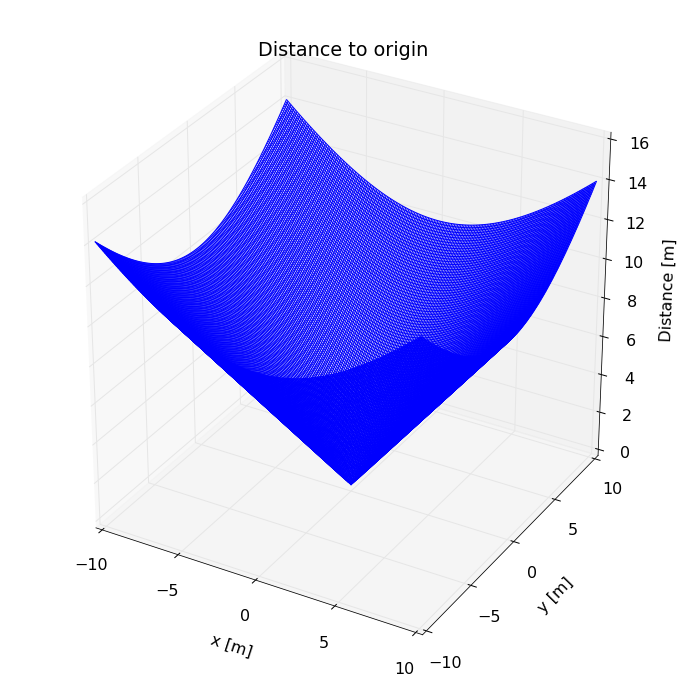

In [76]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(X, Y, d, cmap='Reds_r') # my favourite colormap
ax.set_xlabel("x [m]")
ax.set_ylabel("y [m]")
ax.set_zlabel("Distance [m]")
ax.set_title("Distance to origin")

The wireline plot containes a line for every x,y-increment - a little too much for our high resolution field. You can reduce the number of lines in each direction with the `rstride` and `cstride` keywords:

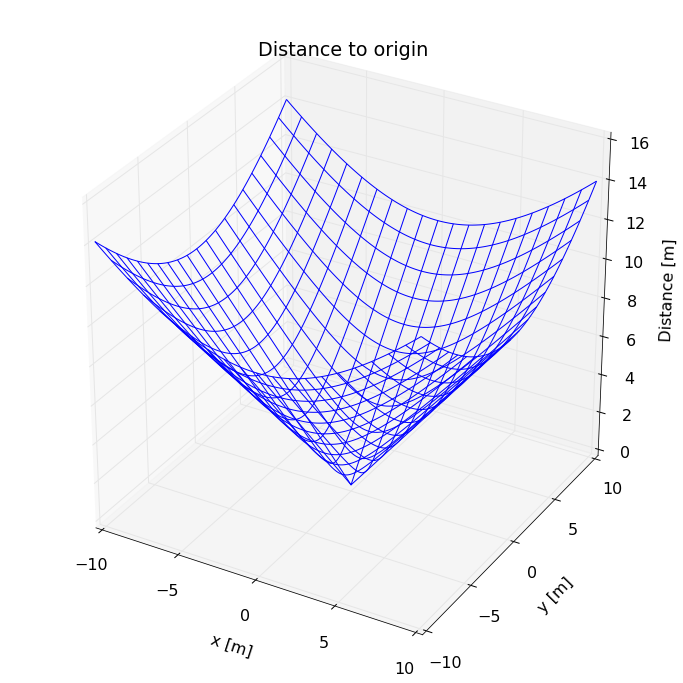

In [77]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(X, Y, d, 
                  cmap='Reds_r',
                  rstride = 10,
                  cstride = 10) 
ax.set_xlabel("x [m]")
ax.set_ylabel("y [m]")
ax.set_zlabel("Distance [m]")
ax.set_title("Distance to origin")